In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('messy_customer_sales_data.csv')
df

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
0,CUST4371,Paul Wilson,m,52.0,KOLKATA,2025-06-26,2025-05-17,26944.0,1.0,peckvictoria@example.com,2131107701,India
1,CUST5957,Jason Thomas,M,51.0 years,NaN,2021-02-17,2025-07-22,44152.0,2.0,owensanthony@example.com,1080761560,india
2,CUST3754,Brittney Martinez,F,62.0,hyderabad,2023-11-05,2024-12-08,31745.0,2.0,tara39@example.org,8981006345,India
3,CUST2934,Brenda Pierce,FEMALE,40.0,hyderabad,2022-03-13,2025-10-02,39674.0,1.0,berrynancy@example.org,8228064204,india
4,CUST5683,Matthew Carroll,f,41.0,CHENNAI,2024-04-05,2024-12-15,NaN,8.0,denise84@example.org,2665569480,India
...,...,...,...,...,...,...,...,...,...,...,...,...
10195,CUST10767,Robert Lewis,female,35.0 years,delhi,2020-12-08,2025-01-25,24167.0,9.0,barrycrane@example.net,5004696571,InDia
10196,NaN,Diane Evans,M,53.0,bangalore,2023-12-31,2025-05-07,11639.0,7.0,lisadennis@example.net,5200349941,IND
10197,CUST6315,Joshua Martinez,m,25.0,hyderabad,2022-02-15,2025-01-11,43832.0,2.0,kelli74@example.org,8147428496,India
10198,CUST4812,Sarah Miller,FEMALE,55.0,NaN,2021-03-16,2025-05-14,18827.0,10.0,dawn84@example.org,2987564247,InDia


In [3]:
df.info() # To check columns data type plus non null count

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         9177 non-null   object 
 1   Name                10200 non-null  object 
 2   Gender              9174 non-null   object 
 3   Age                 9249 non-null   object 
 4   City                9184 non-null   object 
 5   Signup_Date         10200 non-null  object 
 6   Last_Purchase_Date  9188 non-null   object 
 7   Purchase_Amount     9179 non-null   float64
 8   Feedback_Score      9177 non-null   float64
 9   Email               10200 non-null  object 
 10  Phone_Number        10200 non-null  int64  
 11  Country             9468 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 956.4+ KB


In [4]:
df.describe().round() # To check summary statistics

,Purchase_Amount,Feedback_Score,Phone_Number
count,9179.0,9177.0,1.020000e+04
mean,29090.0,5.0,4.979974e+09
std,208697.0,3.0,2.902593e+09
min,-500.0,1.0,9.208990e+05
25%,12295.0,3.0,2.449157e+09
50%,24330.0,5.0,4.988639e+09
75%,37130.0,8.0,7.510448e+09
max,9999999.0,10.0,9.994402e+09


In [5]:
df.isnull().sum() # To check missing values

Customer_ID           1023
Name                     0
Gender                1026
Age                    951
City                  1016
Signup_Date              0
Last_Purchase_Date    1012
Purchase_Amount       1021
Feedback_Score        1023
Email                    0
Phone_Number             0
Country                732
dtype: int64

In [6]:
df.isnull().sum()/len(df)*100 # To check missing values in percentage form

Customer_ID           10.029412
Name                   0.000000
Gender                10.058824
Age                    9.323529
City                   9.960784
Signup_Date            0.000000
Last_Purchase_Date     9.921569
Purchase_Amount       10.009804
Feedback_Score        10.029412
Email                  0.000000
Phone_Number           0.000000
Country                7.176471
dtype: float64

In [7]:
df.shape

(10200, 12)

In [8]:
df[df.duplicated()].shape # To check duplicates

(15, 12)

In [9]:
df[df.duplicated()]

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
2032,CUST2755,Casey Campbell,male,NaN,Hyderabad,2023-12-01,2024-11-04,11778.0,3.0,joseph49@example.com,3844741384,India
3191,NaN,Travis Schneider,f,51.0,NaN,2025-04-20,2025-02-28,48750.0,5.0,bianca77@example.net,7623118785,India
4312,CUST8305,Stanley Cain,FEMALE,51.0,Bangalore,2023-08-14,2024-11-01,11432.0,6.0,calderonbrenda@example.org,4889366037,India
5611,CUST6288,Jonathon Kim,male,46.0,Chennai,2023-11-22,2025-03-21,3301.0,6.0,tparker@example.com,5266662560,India
5680,CUST2695,Lisa Durham,NaN,46.0,Chennai,2021-04-18,2024-10-10,6511.0,3.0,andrew34@example.com,2235480149,India
5899,CUST8841,Amanda Hill,NaN,34.0,chennai,2022-09-11,2025-03-13,42092.0,4.0,ryanriley@example.net,3466026146,India
6070,CUST10780,Emily Smith,NaN,23.0,Kolkata,2023-12-09,2024-10-28,18027.0,5.0,perezchristopher@example.com,3032282870,India
6240,CUST9745,David Morales,NaN,56.0,NaN,2023-02-18,2024-12-14,49107.0,7.0,juliaknapp@example.com,9436163110,India
6425,CUST4631,George Villa,m,26.0,Mumbai,2022-05-21,2025-06-17,NaN,8.0,davidmarquez@example.com,8869465862,India
6498,CUST1711,Stephanie Elliott,NaN,44.0,MUMBAI,2023-05-17,2025-07-12,11349.0,9.0,nfischer@example.com,3270872546,NaN


In [10]:
df['Customer_ID'].value_counts().head(10) # To check primary key has how many duplicates

Customer_ID
CUST3374     2
CUST7749     2
CUST10800    2
CUST6588     2
CUST9062     2
CUST5472     2
CUST1852     2
CUST4160     2
CUST5019     2
CUST6288     2
Name: count, dtype: int64

In [11]:
df[df['Customer_ID']=='CUST3374']

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
2914,CUST3374,Timothy Wallace,m,58.0,Bangalore,2024-03-08,2025-08-21,45779.0,1.0,glenn95@example.org,9687701793,India
3047,CUST3374,Timothy Wallace,m,58.0,bangalore,2024-03-08,2025-08-21,45779.0,1.0,glenn95@example.org,9687701793,India


In [12]:
df.nunique()

Customer_ID            9000
Name                   9364
Gender                    8
Age                     108
City                     18
Signup_Date            1820
Last_Purchase_Date      366
Purchase_Amount        8182
Feedback_Score           10
Email                  9797
Phone_Number          10000
Country                   4
dtype: int64

In [13]:
for col in df.columns:
    if df[col].nunique()<20:
        print(df[col].value_counts())

Gender
f         1184
M         1171
m         1163
F         1157
MALE      1131
female    1128
male      1121
FEMALE    1119
Name: count, dtype: int64
City
Kolkata       820
Mumbai        812
Chennai       784
Bangalore     773
Hyderabad     770
Delhi         763
CHENNAI       404
KOLKATA       395
MUMBAI        393
hyderabad     384
bangalore     383
DELHI         378
delhi         369
BANGALORE     363
HYDERABAD     360
mumbai        352
chennai       343
kolkata       338
Name: count, dtype: int64
Feedback_Score
2.0     952
4.0     947
7.0     938
6.0     927
3.0     913
8.0     912
1.0     907
9.0     903
10.0    901
5.0     877
Name: count, dtype: int64
Country
India    7132
IND       793
india     772
InDia     771
Name: count, dtype: int64


### Handling Missing Values

In [15]:
# Delete rows/columns => If more than 50% of data is missing.
# Imputation => 
# Filling missing values:
# Mean/Median/Mode => For Numerical Columns
# Mode/Unknown => For Categorical Columns
# Forward Fill/Backward => For Date Time Columns and Numerical Columns
# Predictive Imputation using ML Model

In [16]:
df.dropna(subset=['Customer_ID'],inplace=True)

In [17]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                934
Age                   859
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount       927
Feedback_Score        905
Email                   0
Phone_Number            0
Country               664
dtype: int64

In [18]:
df['Age'].unique()

array(['52.0', '51.0 years', '62.0', '40.0', '41.0', nan, '18.0',
       '43.0 years', '40.0 years', '26.0', '32.0', '22.0', '59.0', '65.0',
       '61.0', '31.0', '54.0 years', '55.0', '69.0', '61.0 years', '24.0',
       '63.0', '19.0', '50.0', '56.0', '36.0', '68.0', '43.0', '38.0',
       '27.0', '57.0 years', '23.0', '25.0', '66.0', '28.0', '30.0',
       '46.0', '48.0', '20.0', '37.0', '67.0', '51.0', '35.0', '58.0',
       '29.0', 'nan years', '39.0', '49.0', '47.0', '42.0', '44.0',
       '64.0', '53.0', '60.0', '59.0 years', '45.0', '21.0', '34.0',
       '54.0', '48.0 years', '46.0 years', '33.0', '57.0', '30.0 years',
       '58.0 years', '35.0 years', '34.0 years', '69.0 years', '250',
       '19.0 years', '27.0 years', '53.0 years', '65.0 years',
       '66.0 years', '44.0 years', '49.0 years', '25.0 years',
       '23.0 years', '62.0 years', '41.0 years', '33.0 years',
       '28.0 years', '22.0 years', '20.0 years', '42.0 years',
       '45.0 years', '3', '63.0 years', '

In [19]:
import re
def extract_age(age):
    age_num = re.findall('[0-9]+',str(age))
    if len(age_num)>0:
        return age_num[0]
    else:
        return age
df['Age'] = df['Age'].apply(lambda x: extract_age(x))

In [20]:
df['Age'].unique()

array(['52', '51', '62', '40', '41', nan, '18', '43', '26', '32', '22',
       '59', '65', '61', '31', '54', '55', '69', '24', '63', '19', '50',
       '56', '36', '68', '38', '27', '57', '23', '25', '66', '28', '30',
       '46', '48', '20', '37', '67', '35', '58', '29', 'nan years', '39',
       '49', '47', '42', '44', '64', '53', '60', '45', '21', '34', '33',
       '250', '3', '10'], dtype=object)

In [21]:
df_age = df[df['Age']!='nan years']['Age']

In [22]:
age_median = int(df_age.dropna().astype('int64').median())

In [23]:
age_median

43

In [24]:
df.replace('nan years',age_median,inplace=True)

In [25]:
df_age.unique()

array(['52', '51', '62', '40', '41', nan, '18', '43', '26', '32', '22',
       '59', '65', '61', '31', '54', '55', '69', '24', '63', '19', '50',
       '56', '36', '68', '38', '27', '57', '23', '25', '66', '28', '30',
       '46', '48', '20', '37', '67', '35', '58', '29', '39', '49', '47',
       '42', '44', '64', '53', '60', '45', '21', '34', '33', '250', '3',
       '10'], dtype=object)

In [26]:
df['Age'].fillna(age_median,inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10836\166436914.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(age_median,inplace=True)


In [27]:
df['Age'].unique()

array(['52', '51', '62', '40', '41', 43, '18', '43', '26', '32', '22',
       '59', '65', '61', '31', '54', '55', '69', '24', '63', '19', '50',
       '56', '36', '68', '38', '27', '57', '23', '25', '66', '28', '30',
       '46', '48', '20', '37', '67', '35', '58', '29', '39', '49', '47',
       '42', '44', '64', '53', '60', '45', '21', '34', '33', '250', '3',
       '10'], dtype=object)

In [28]:
df['Purchase_Amount'].fillna(df['Purchase_Amount'].median(),inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10836\676175059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purchase_Amount'].fillna(df['Purchase_Amount'].median(),inplace=True)


In [29]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                934
Age                     0
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount         0
Feedback_Score        905
Email                   0
Phone_Number            0
Country               664
dtype: int64

In [30]:
df['Feedback_Score'].fillna(df['Feedback_Score'].mode()[0],inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10836\1359314884.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Feedback_Score'].fillna(df['Feedback_Score'].mode()[0],inplace=True)


In [31]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                934
Age                     0
City                  918
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount         0
Feedback_Score          0
Email                   0
Phone_Number            0
Country               664
dtype: int64

In [32]:
for col in ['Gender','City','Country']:
    df[col].fillna(df[col].mode()[0],inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10836\126056359.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0],inplace=True)


In [33]:
df.isnull().sum()

Customer_ID             0
Name                    0
Gender                  0
Age                     0
City                    0
Signup_Date             0
Last_Purchase_Date    914
Purchase_Amount         0
Feedback_Score          0
Email                   0
Phone_Number            0
Country                 0
dtype: int64

In [34]:
df['Last_Purchase_Date'].ffill(inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10836\3085584411.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Last_Purchase_Date'].ffill(inplace=True)


In [35]:
df.isnull().sum()

Customer_ID           0
Name                  0
Gender                0
Age                   0
City                  0
Signup_Date           0
Last_Purchase_Date    0
Purchase_Amount       0
Feedback_Score        0
Email                 0
Phone_Number          0
Country               0
dtype: int64

### Fixing Inconsistent Formatting

In [37]:
df['Gender'].unique()

array(['m ', 'M', 'F', 'FEMALE', 'f ', 'male', 'MALE', 'female'],
      dtype=object)

In [38]:
df['Gender'] = df['Gender'].str.lower().str.strip()

In [39]:
df['Gender'].replace({'m':'male','f':'female'},inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10836\132541706.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'m':'male','f':'female'},inplace=True)


In [40]:
df['Gender'].unique()

array(['male', 'female'], dtype=object)

In [41]:
df['City'].unique()

array([' KOLKATA ', ' Kolkata ', ' hyderabad ', ' CHENNAI ', ' kolkata ',
       ' BANGALORE ', ' Hyderabad ', ' HYDERABAD ', ' Mumbai ',
       ' chennai ', ' Delhi ', ' bangalore ', ' Bangalore ', ' delhi ',
       ' Chennai ', ' MUMBAI ', ' DELHI ', ' mumbai '], dtype=object)

In [42]:
df['City'] = df['City'].str.lower().str.strip()

In [43]:
df['City'].unique()

array(['kolkata', 'hyderabad', 'chennai', 'bangalore', 'mumbai', 'delhi'],
      dtype=object)

In [44]:
df['Country'].unique()

array(['India', 'india', 'InDia', 'IND'], dtype=object)

In [45]:
df['Country'] = df['Country'].str.lower().str.strip()

In [46]:
df['Country'].replace({'ind':'india'},inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_10836\439051039.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Country'].replace({'ind':'india'},inplace=True)


In [47]:
df['Country'].unique()

array(['india'], dtype=object)

### Handling Duplicates

In [49]:
df[df.duplicated()].shape

(163, 12)

In [50]:
df.drop_duplicates(inplace=True)

In [51]:
df[df.duplicated()].shape

(0, 12)

In [52]:
df['Customer_ID'].value_counts()

Customer_ID
CUST9534    2
CUST4196    2
CUST5341    2
CUST2510    2
CUST1002    2
           ..
CUST7618    1
CUST2436    1
CUST5982    1
CUST5432    1
CUST4812    1
Name: count, Length: 9000, dtype: int64

In [53]:
df[df['Customer_ID']=='CUST9534']

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
3528,CUST9534,Melissa Jones,male,53,kolkata,2021-08-26,2025-08-11,21959.0,8.0,cassandrahill@example.net,7734467854,india
9005,CUST9534,Melissa Jones,male,53,kolkata,2021-08-26,2025-01-05,21959.0,8.0,cassandrahill@example.net,7734467854,india


In [54]:
df.drop_duplicates(subset=['Customer_ID'],keep='first',inplace=True)

In [55]:
df.shape

(9000, 12)

### Correcting Data Types

In [57]:
df['Age']=df['Age'].astype('int64')

In [58]:
df['Signup_Date']=pd.to_datetime(df['Signup_Date'])

In [59]:
df['Last_Purchase_Date']=pd.to_datetime(df['Last_Purchase_Date'])

<Axes: >

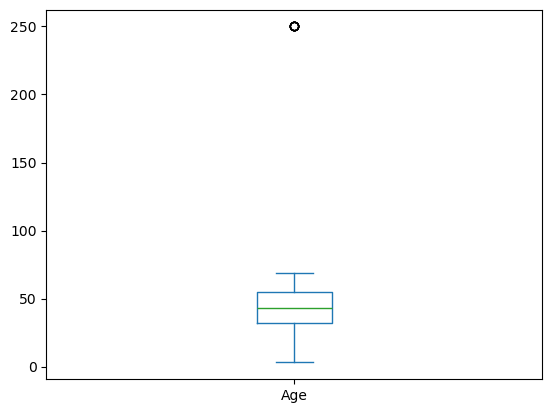

In [60]:
df['Age'].plot.box()

<Axes: >

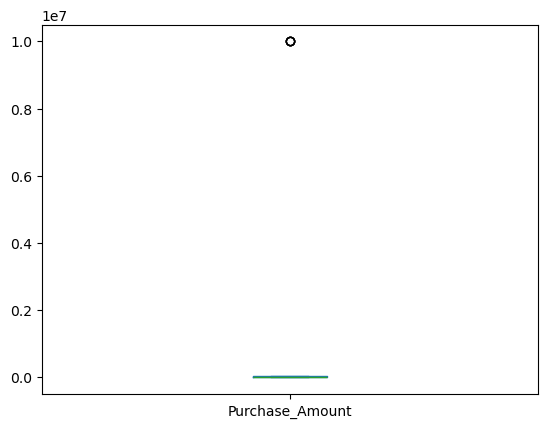

In [61]:
df['Purchase_Amount'].plot.box()

<Axes: >

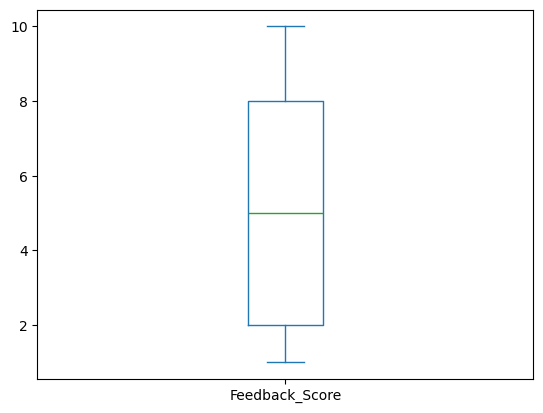

In [62]:
df['Feedback_Score'].plot.box()

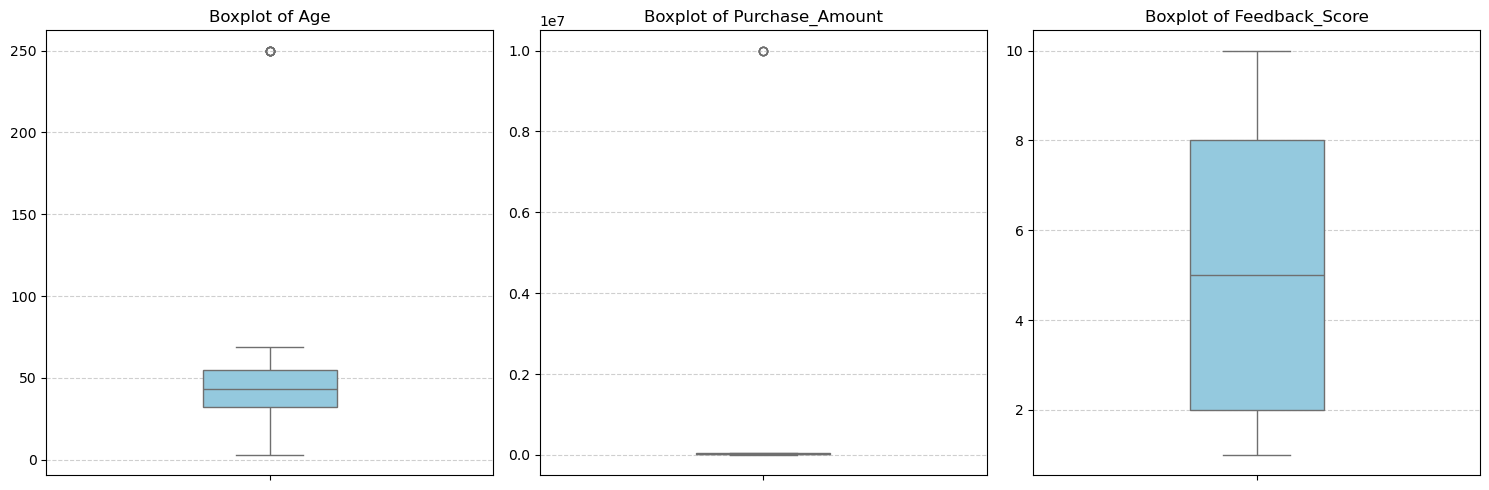

In [63]:
cols = ['Age','Purchase_Amount','Feedback_Score']
plt.figure(figsize=(15,5))
for i, col in enumerate(cols,1):
    plt.subplot(1,3,i)
    sns.boxplot(y=df[col],color='skyblue',width=0.3)
    plt.title(f'Boxplot of {col}',fontsize=12)
    plt.ylabel('')
    plt.grid(axis='y',linestyle='--',alpha=0.6)
plt.tight_layout()
plt.show()

In [64]:
from scipy import stats

In [65]:
z_scores = np.abs(stats.zscore(df[['Age','Purchase_Amount']]))

In [66]:
df[(z_scores>3).any(axis=1)]

,Customer_ID,Name,Gender,Age,City,Signup_Date,Last_Purchase_Date,Purchase_Amount,Feedback_Score,Email,Phone_Number,Country
470,CUST6977,Tyler Stout,female,250,chennai,2022-05-21,2025-05-31,3554.0,2.0,hudsonsandra@example.net,5752427586,india
932,CUST1207,Cathy Robinson,female,250,delhi,2024-10-24,2025-10-01,23012.0,6.0,jefftaylor@example.org,1244788430,india
2383,CUST3987,Erica Johnson,male,47,kolkata,2020-11-03,2025-08-10,9999999.0,5.0,bflowers@example.com,747807729,india
3368,CUST7314,Gavin Yates,male,50,bangalore,2022-06-30,2025-03-22,9999999.0,10.0,millermichael@example.com,1481715956,india
4674,CUST8481,Denise Combs,female,62,mumbai,2024-10-06,2025-07-08,9999999.0,3.0,cmorales@example.net,2931912910,india
4692,CUST10561,Richard Brown,female,58,mumbai,2024-04-13,2025-09-08,9999999.0,2.0,kevintaylor@example.net,7047881855,india
5279,CUST4536,Alexandra Ramos,male,250,chennai,2021-09-30,2025-03-03,3296.0,10.0,drakemichelle@example.org,5651607326,india
5949,CUST7041,Joseph Young,male,250,delhi,2022-01-20,2024-11-26,1131.0,8.0,pmckenzie@example.org,9456700786,india
6085,CUST8110,Betty Cole,female,250,bangalore,2024-01-07,2025-04-12,25974.0,1.0,dmitchell@example.net,366613689,india
6615,CUST10236,Brittney Boyd,male,250,kolkata,2022-04-01,2024-12-25,17284.0,3.0,andrewcraig@example.org,3843232885,india


In [67]:
df_clean = df[~(z_scores>3).any(axis=1)]

In [68]:
df_clean.shape

(8989, 12)